In [1]:
import numpy as np
import pandas as pd
import polars as pl

from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
from chart_studio import plotly as py
from plotly import graph_objects as go
import plotly.express as px
from plotly.offline import plot, iplot, download_plotlyjs, init_notebook_mode
import cufflinks as cf

pd.options.display.max_columns = 15
pd.options.display.max_rows = 25
pd.options.display.precision = 1
%matplotlib inline
init_notebook_mode(connected = True)
cf.go_offline()

In [15]:
tips_df = px.data.tips()
tips_pldf = pl.DataFrame(tips_df)

In [16]:
tips_pldf.head(5)

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4


In [17]:
tips_pldf.columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [18]:
tips_pldf.describe()

describe,total_bill,tip,sex,smoker,day,time,size
str,f64,f64,str,str,str,str,f64
"""count""",244.0,244.0,"""244""","""244""","""244""","""244""",244.0
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""",0.0
"""mean""",19.785943,2.998279,null,null,null,null,2.569672
"""std""",8.902412,1.383638,null,null,null,null,0.9511
"""min""",3.07,1.0,"""Female""","""No""","""Fri""","""Dinner""",1.0
"""max""",50.81,10.0,"""Male""","""Yes""","""Thur""","""Lunch""",6.0
"""median""",17.795,2.9,null,null,null,null,2.0


In [19]:
tips_df.describe()

,total_bill,tip,size
count,244.0,244.0,244.0
mean,19.8,3.0,2.6
std,8.9,1.4,1.0
min,3.1,1.0,1.0
25%,13.3,2.0,2.0
50%,17.8,2.9,2.0
75%,24.1,3.6,3.0
max,50.8,10.0,6.0


In [20]:
tips_pldf.null_count()

total_bill,tip,sex,smoker,day,time,size
u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0


In [21]:
tips_df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [22]:
# tips_pldf.drop_nulls(subset)
# tips_df.dropna(subset, how)

In [26]:
tips_df.melt(value_vars=tips_df.select_dtypes(include = ['float64', 'int64']), value_name='xxx')

,variable,xxx
0,total_bill,17.0
1,total_bill,10.3
2,total_bill,21.0
3,total_bill,23.7
4,total_bill,24.6
...,...,...
727,size,3.0
728,size,2.0
729,size,2.0
730,size,2.0


In [28]:
tips_df.explode('tip')

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3
240,27.2,2.0,Female,Yes,Sat,Dinner,2
241,22.7,2.0,Male,Yes,Sat,Dinner,2
242,17.8,1.8,Male,No,Sat,Dinner,2


In [29]:
d = tips_df.melt(value_vars = tips_df.select_dtypes(include = ['float64', 'int64']), value_name='xxx', )

In [30]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3
2,21.0,3.5,Male,No,Sun,Dinner,3
3,23.7,3.3,Male,No,Sun,Dinner,2
4,24.6,3.6,Female,No,Sun,Dinner,4


In [39]:
tips_df.pivot_table(index = 'day', columns = 'sex', values = 'tip', aggfunc = 'sum')

sex,Female,Male
day,,
Fri,25.0,26.9
Sat,78.5,181.9
Sun,60.6,186.8
Thur,82.4,89.4


<AxesSubplot:xlabel='day'>

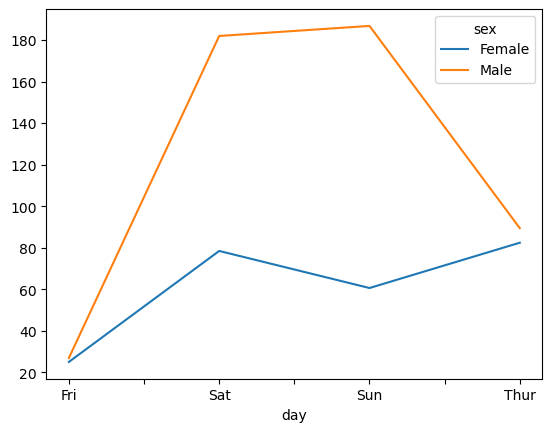

In [36]:
tips_df.pivot_table(index = 'day', columns = 'sex', values = 'tip', aggfunc = 'sum').plot(kind = 'line')

In [35]:
tips_df.groupby(['sex', 'day'])['tip'].agg('sum')

sex     day 
Female  Fri      25.0
        Sat      78.5
        Sun      60.6
        Thur     82.4
Male    Fri      26.9
        Sat     181.9
        Sun     186.8
        Thur     89.4
Name: tip, dtype: float64

In [37]:
d

,variable,xxx
0,total_bill,17.0
1,total_bill,10.3
2,total_bill,21.0
3,total_bill,23.7
4,total_bill,24.6
...,...,...
727,size,3.0
728,size,2.0
729,size,2.0
730,size,2.0


In [45]:
pd.crosstab(index = tips_df.day, columns = tips_df.sex, values = tips_df.tip, 
            aggfunc = 'sum', normalize = False, 
            margins = True, margins_name = 'Totals')

sex,Female,Male,Totals
day,,,
Fri,25.0,26.9,52.0
Sat,78.5,181.9,260.4
Sun,60.6,186.8,247.4
Thur,82.4,89.4,171.8
Totals,246.5,485.1,731.6


In [48]:
tips_df.tip.std()

1.3836381890011826

In [49]:
tips_df.tip.var()

1.9144546380624725

In [51]:
tips_pldf.groupby(['day', 'sex']).agg(pl.sum('tip'))

day,sex,tip
str,str,f64
"""Sun""","""Male""",186.78
"""Sat""","""Female""",78.45
"""Sun""","""Female""",60.61
"""Sat""","""Male""",181.95
"""Fri""","""Female""",25.03
"""Fri""","""Male""",26.93
"""Thur""","""Male""",89.41
"""Thur""","""Female""",82.42


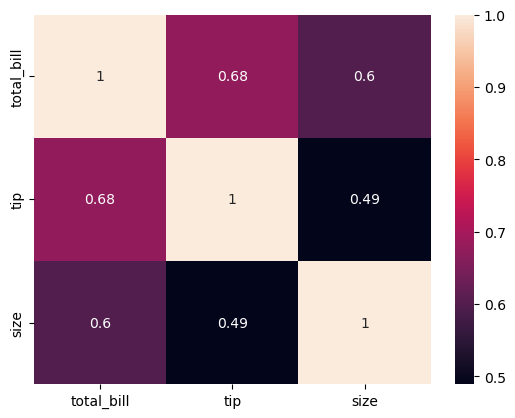

In [54]:
sns.heatmap(tips_df.corr(), annot = True);

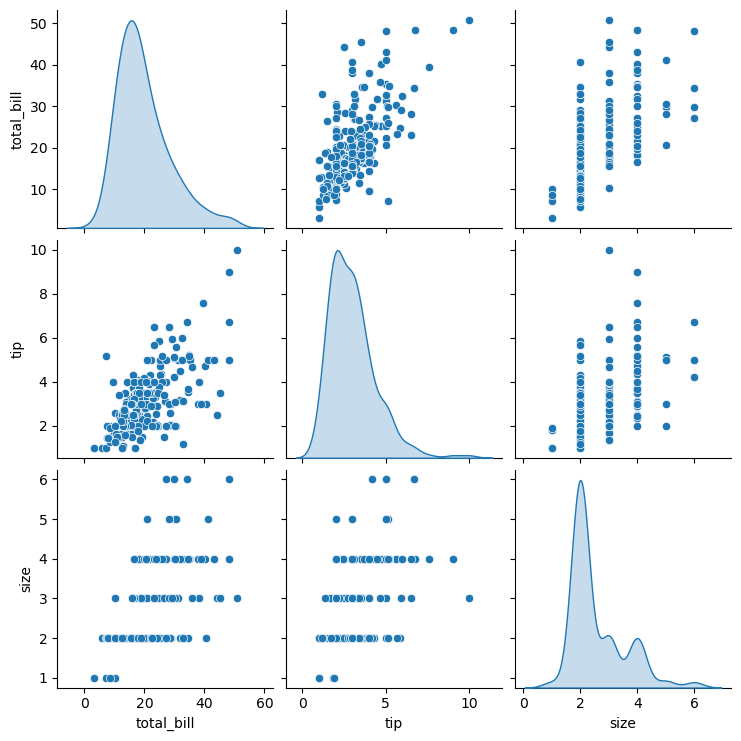

In [56]:
sns.pairplot(data = tips_df, diag_kind='kde')

array([[<AxesSubplot:xlabel='total_bill', ylabel='total_bill'>,
        <AxesSubplot:xlabel='tip', ylabel='total_bill'>,
        <AxesSubplot:xlabel='size', ylabel='total_bill'>],
       [<AxesSubplot:xlabel='total_bill', ylabel='tip'>,
        <AxesSubplot:xlabel='tip', ylabel='tip'>,
        <AxesSubplot:xlabel='size', ylabel='tip'>],
       [<AxesSubplot:xlabel='total_bill', ylabel='size'>,
        <AxesSubplot:xlabel='tip', ylabel='size'>,
        <AxesSubplot:xlabel='size', ylabel='size'>]], dtype=object)

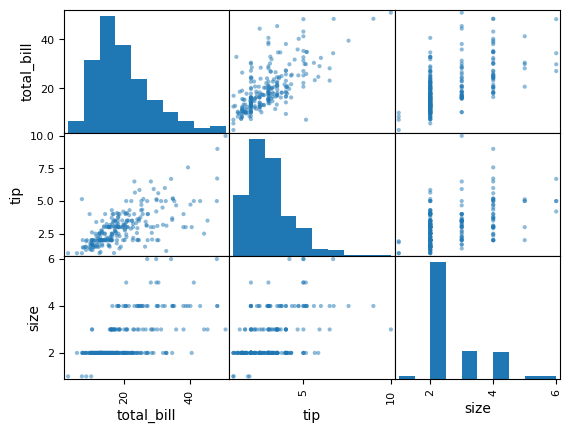

In [57]:
pd.plotting.scatter_matrix(tips_df)

In [61]:
alt.Chart(tips_df).mark_point(size = 12).encode(
    y = 'tip',
    x = 'total_bill',
    color = 'day',
    size = 'sex',
    tooltip = 'size'
).properties(
    title = 'Scatter'
).interactive()

alt.Chart(...)

In [64]:
alt.Chart(tips_df).mark_point().encode(
    x = alt.X('total_bill', bin = True),
    y = 'tip',
    color = 'sex'
)

alt.Chart(...)

In [68]:
alt.Chart(tips_df).mark_bar().encode(
    x = alt.X('total_bill', bin = True),
    y = 'count()',
    color = 'sex:O'
).properties

alt.Chart(...)